In [6]:
import mne
import os
from mne.preprocessing import ICA
%matplotlib qt5

In [7]:
# LOAD THE DATA
base_path = os.path.join(os.getcwd(), 'data')
print("The base directory is: ", base_path)
eeg_dir = os.path.join(base_path, 'eeg')
print("The files in the folder: ", os.listdir(base_path))

The base directory is:  C:\Users\alisa_000\Neuromarketing\data
The files in the folder:  ['477819.eeg', '477819.vhdr', '477819.vmrk', '477819_1.edf', '477819_2.edf', '477819_2.eeg', '477819_2.vhdr', '477819_2.vmrk', 'averaged_data-ave.fif']


In [2]:
# CLASSIFYING THE DATA
vhdr_files = [f for f in os.listdir(base_path) if f.endswith('.vhdr')]
file = vhdr_files[0]

raw = mne.io.read_raw_brainvision(os.path.join(base_path, file), stim_channel = True, preload = True)
raw.set_channel_types(mapping={'EOG1': 'eog','EOG2': 'eog','EOG3': 'eog','EOG4': 'eog'})

montage = mne.channels.read_montage("standard_1020")
raw.set_montage(montage)

# QUICK CHECK

#raw.info
#raw.plot()


NameError: name 'os' is not defined

120 events found
Event IDs: [  2   3   4   8  14  15  17  18  19  21  23  28  30  32  33  34  35  36
  37  38  41  42  44  47  48  51  53  54  55  57  62  63  64  68  74  75
  77  78  79  81  83  88  90  92  93  94  95  96  97  98 101 102 104 107
 108 111 113 114 115 117 121 122 132 137 138 139 141 143 144 145 147 148
 150 151 152 155 157 158 160 162 166 168 169 171 172 173 176 177 179 180
 181 182 192 197 198 199 201 203 204 205 207 208 210 211 212 215 217 218
 220 222 226 228 229 231 232 233 236 237 239 240]


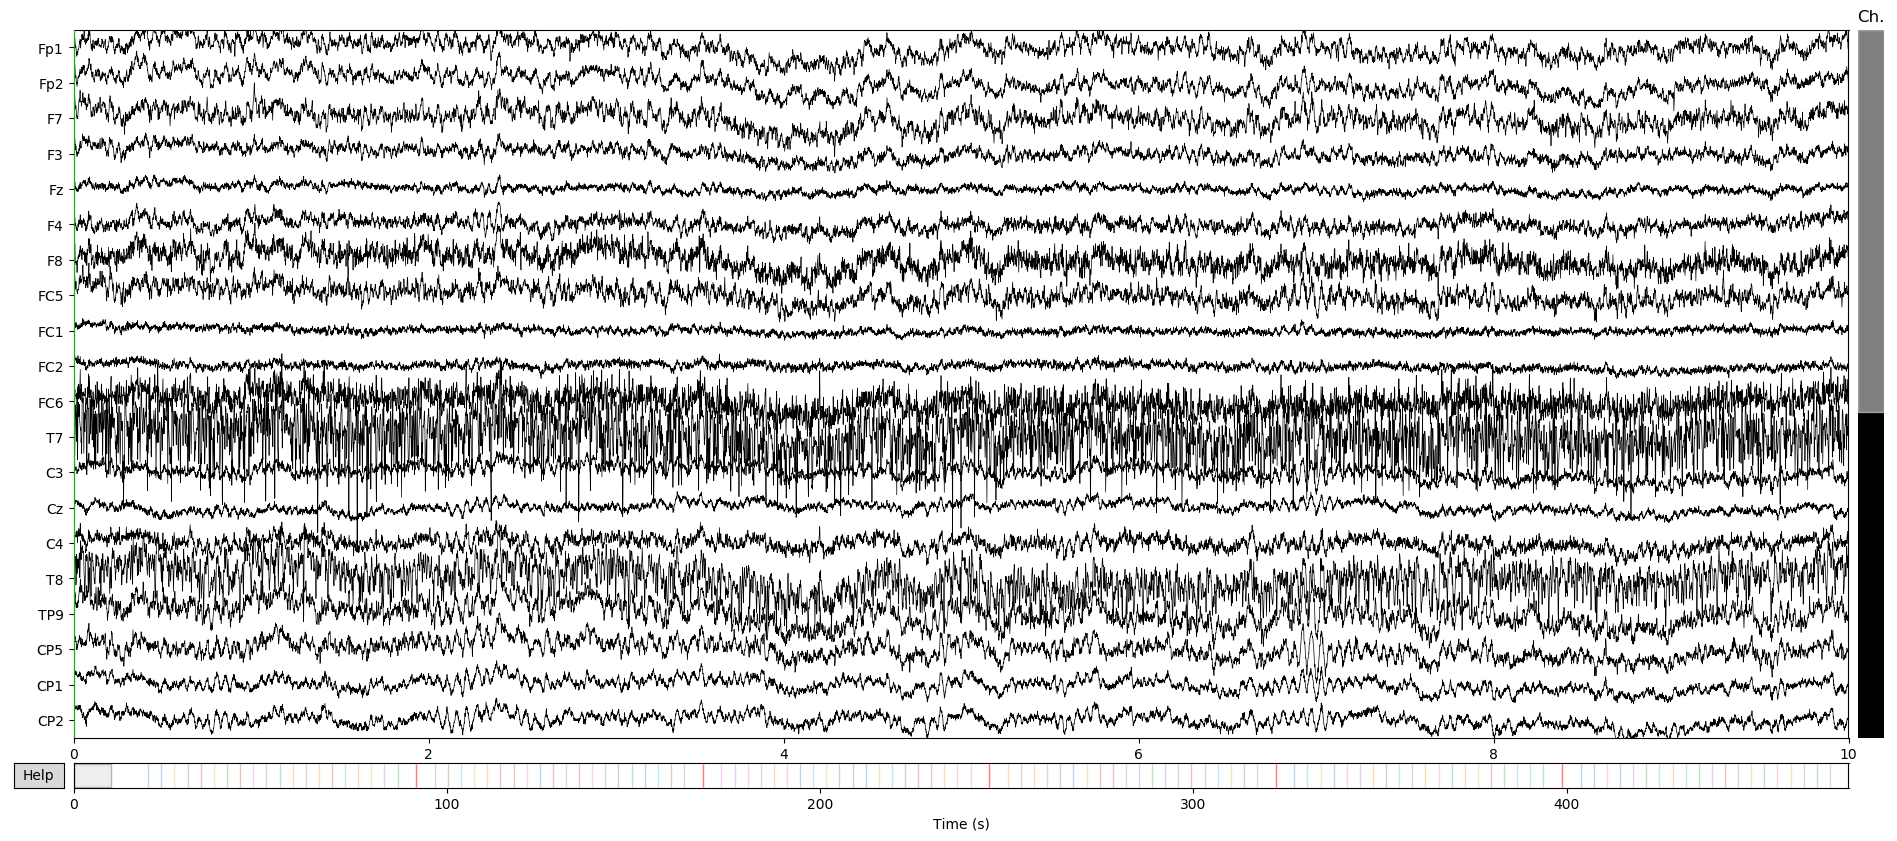

In [15]:
# THIS WORKS ONLY IF YOU HAVE 120 EVENTS
# CROP THE PAUSES OUT 

events = mne.find_events(raw, stim_channel = 'STI 014')
event_times = events[:,0]
#print(event_times)

raw1 = raw.copy().crop((event_times[0]/1000)-20, (event_times[19]/1000)+5)
raw2 = raw.copy().crop((event_times[20]/1000)-5, (event_times[39]/1000)+5)
raw3 = raw.copy().crop((event_times[40]/1000)-5, (event_times[59]/1000)+5)
raw4 = raw.copy().crop((event_times[60]/1000)-5, (event_times[79]/1000)+5)
raw5 = raw.copy().crop((event_times[80]/1000)-5, (event_times[99]/1000)+5)
raw6 = raw.copy().crop((event_times[100]/1000)-5, (event_times[119]/1000)+5)

raw1.append([raw2, raw3, raw4, raw5, raw6])
raw1.plot()

In [16]:
raw1.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 37 items (EEG: 32, EOG: 4, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 35 items
    events : list | 0 items
    highpass : float | 0.015915494309189534 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 1000.0 Hz
    meas_date : tuple | 2019-03-04 10:44:34 GMT
    nchan : int | 37
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subjec

In [17]:
import matplotlib.pyplot as plt
import numpy as np

First we need to find the events from data. This is done with the help of MNE functions. Our stimulus channel is called 'STI 014'.

Remember that an evoked potential is an electrical potential recorded from the nervous system of a human following presentation of a stimulus.

Therefore, we convert the data to evoked data.

We also create a dict, where we can track the event_id with its name.


Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 samples (3.301 sec) selected
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 samples (3.301 sec) selected
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 samples (3.301 sec) selected
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 samples (3.301 sec) selected
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 samples (3.301 sec) selected
Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3301 sam

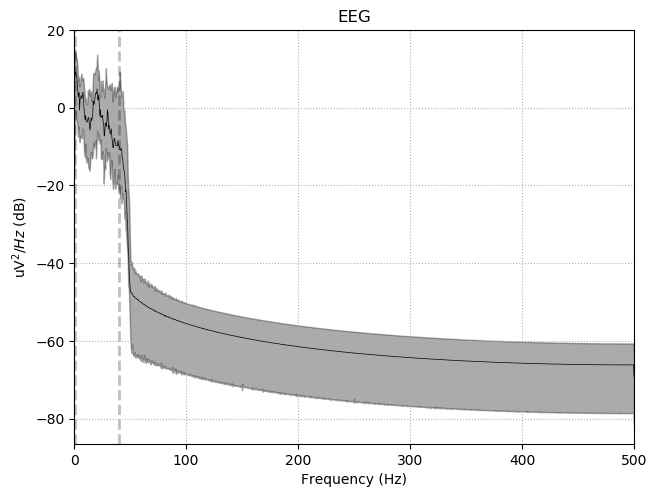

In [12]:
#FILTERING & ARTIFACTS REMOVAL

raw1.filter(1., 40., fir_design='firwin')
raw1.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)

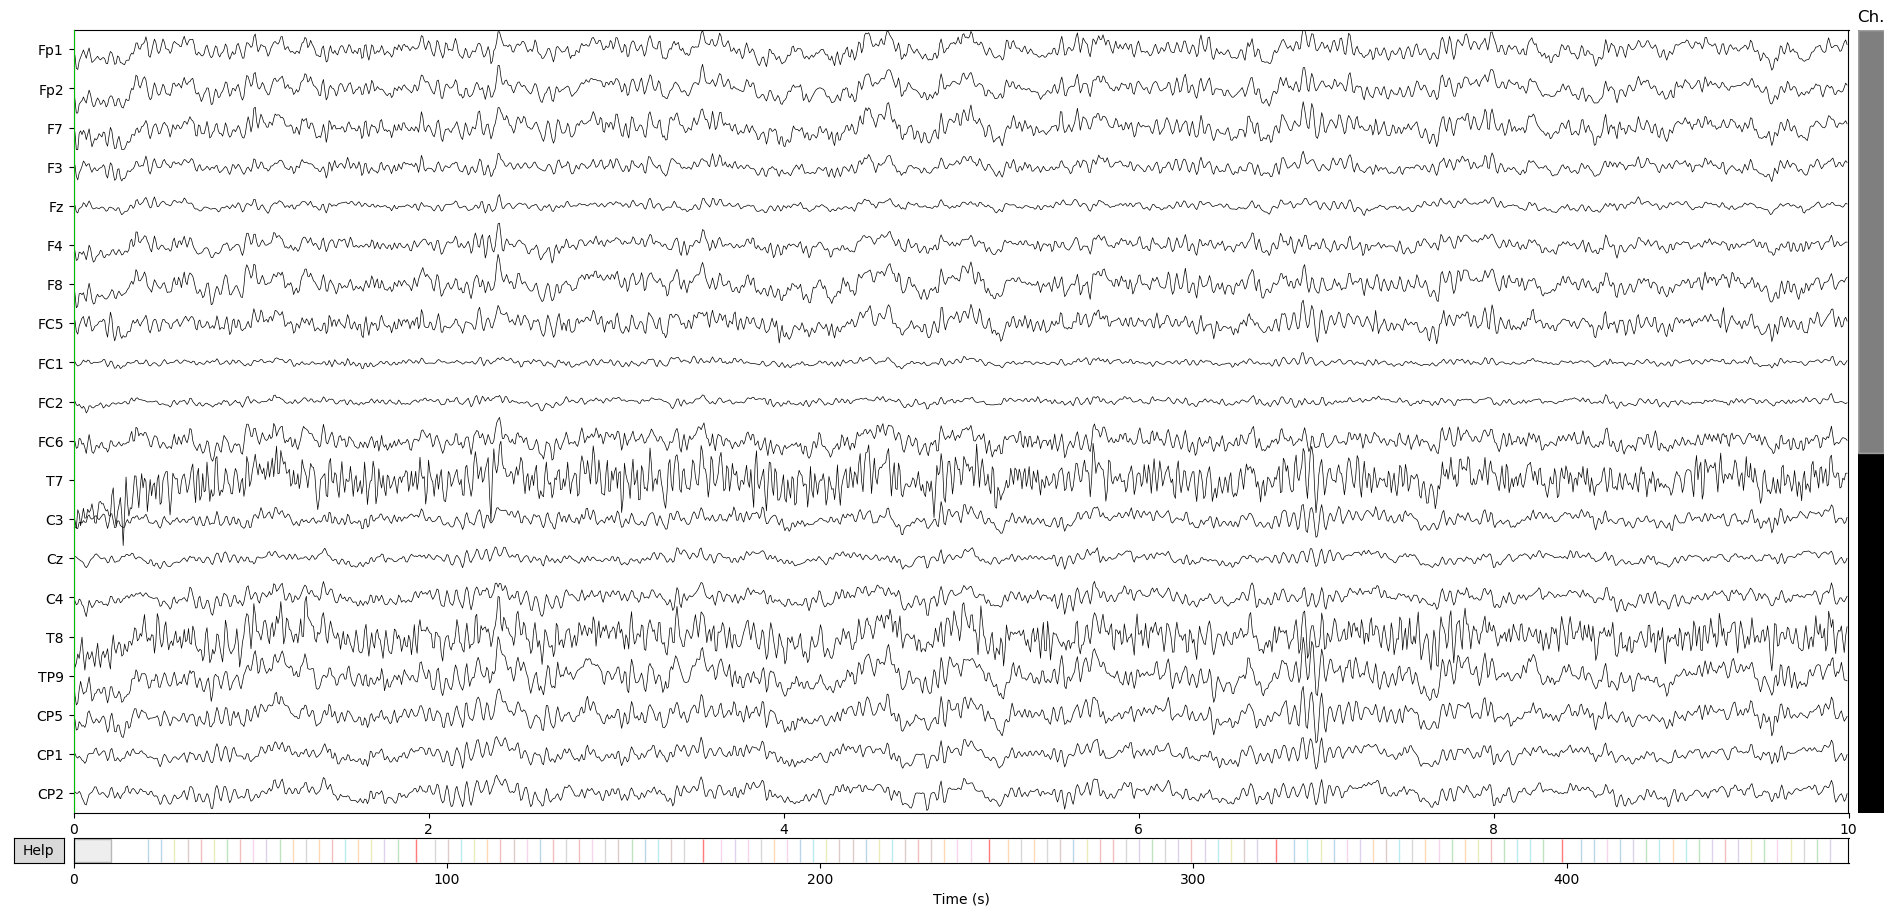

In [13]:
raw1.plot()

In [14]:
raw1.save("filtered_raw.fif")

Writing C:\Users\alisa_000\Neuromarketing\filtered_raw.fif
Closing C:\Users\alisa_000\Neuromarketing\filtered_raw.fif [done]


In [4]:
# Let us read the events
#events = mne.find_events(raw1, stim_channel = 'STI 014')
print("Let us print the first four events\n", events[:4])

# Let us convert the data to evoked data

# Let us create a dict for the events_id parameter

import csv
reader = csv.reader(open('477819_test2.csv', 'r'))
d = {}
for row in reader:
    k, v = row
    d[k] = int(float(v))
    
print(d)

# The time window
tmin = -0.2
tmax = 0.9

# Construct epochs
epochs = mne.Epochs(raw1, events, event_id=d, preload=True, baseline=(-0.2,0))
#epochs = mne.Epochs(raw1, events, event_id=d, preload=True, baseline=None)
#epochs = mne.Epochs(raw_data, events, preload=True)

# Let us average the first set



NameError: name 'events' is not defined

In [70]:
n_components = 25
method = 'fastica'
decim = 3 
random_state = 23

ica = ICA(n_components=n_components, method=method, random_state=random_state)
reject = None

picks = mne.pick_types(raw1.info, meg=False, eeg=True, eog=False, stim=False)
ica.fit(raw1, picks=picks, decim=decim, reject=reject)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 19.1s.


<ICA  |  raw data decomposition, fit (fastica): 158498 samples, 25 components, channels used: "eeg">

Transforming to ICA space (25 components)
Zeroing out 0 ICA components


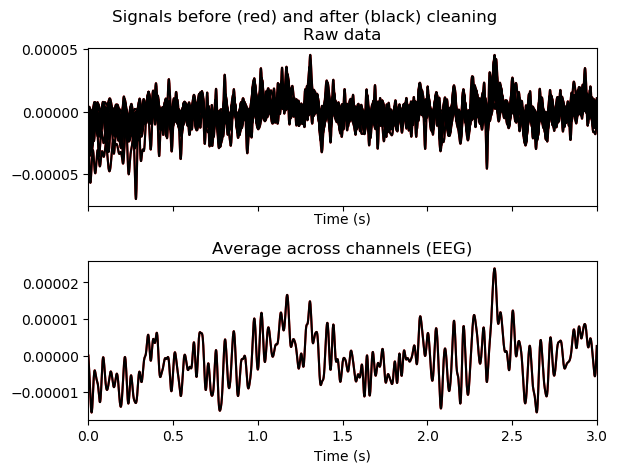

In [75]:
# Plot ICA components
ica.plot_components()
ica.plot_overlay(raw1)

In [19]:
ica.plot_properties(raw1, picks=0)

    Using multitaper spectrum estimation with 7 DPSS windows


[<Figure size 700x600 with 5 Axes>]

In [ ]:
ica.plot_properties(raw1, picks=1)

In [20]:
ica.plot_properties(raw1, picks=2)

    Using multitaper spectrum estimation with 7 DPSS windows


[<Figure size 700x600 with 5 Axes>]

In [21]:
ica.plot_properties(raw1, picks=3)

    Using multitaper spectrum estimation with 7 DPSS windows


[<Figure size 700x600 with 5 Axes>]

EOG channel index for this subject is: [32 33 34 35]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 16384 samples (16.384 sec) selected
Setting up band-pass filter from 2 - 45 Hz
Filter length of 16384 samples (16.384 sec) selected
Setting up band-pass filter from 2 - 45 Hz
Filter length of 16384 samples (16.384 sec) selected
Setting up band-pass filter from 2 - 45 Hz
Filter length of 16384 samples (16.384 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
Now detecting blinks and generating corresponding events
Number of EOG events detected : 103
103 matching events found
No baseline correction applied
Not setting metadata
Loading data for 103 events and 1001 original time points ...
0 bad epochs dropped
EOG channel index for this subject is: [32 33 34 35]
Filtering the data to remove DC offset to help distinguish blinks from saccades


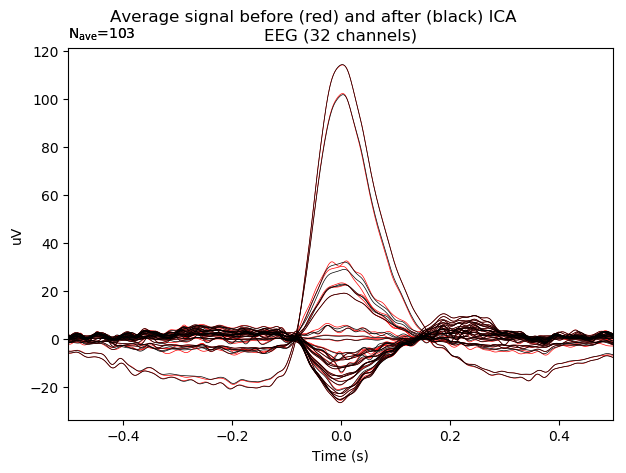

In [72]:
from mne.preprocessing import create_eog_epochs

eog_average = create_eog_epochs(raw1, reject=reject, picks=picks).average()
eog_epochs = create_eog_epochs(raw1, reject=reject)  # get single EOG trials
eog_inds, scores = ica.find_bads_eog(eog_epochs, threshold = 2) # find via correlation

# Plot ICA
ica.plot_scores(scores, exclude=eog_inds)  # look at r scores of components
ica.plot_sources(eog_average, exclude=eog_inds)  # look at source time course
ica.plot_overlay(eog_average, exclude=eog_inds, show=False)
#ica.plot_properties(eog_epochs, picks=eog_inds, psd_args={'fmax': 35.},
                    #image_args={'sigma': 1.})
                    
#eog_inds=[0] ## if you spot bad component still, reject them manually 
#ica.exclude.extend(eog_inds)
#del eog_inds, scores, eog_epochs, eog_average

In [76]:
#ica.exclude.extend([0, 6, 21])
#ica.exclude.extend([10, 11])
ica.plot_components()


[<Figure size 750x700 with 20 Axes>, <Figure size 750x250 with 5 Axes>]

Transforming to ICA space (25 components)
Zeroing out 4 ICA components


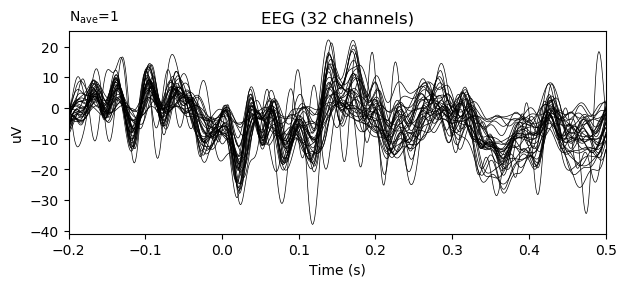

In [59]:
ica.save("latest_ica.fif")
ica.apply(epochs)
# Construct epochs
#epochs = mne.Epochs(raw, events, event_id=d, preload=True, baseline=(-0.2,0))
#epochs = mne.Epochs(raw_data, events, preload=True)

# Let us average the first set

evoked1 = epochs['Tesla cheap'].average()
evoked2 = epochs['tasty Hesburger'].average()
evoked3 = epochs['Nike athletic'].average()
evoked4 = epochs['failing Supercell'].average()
evoked5 = epochs['cheap Pirkka'].average()

evoked1.plot()
evoked2.plot()
evoked3.plot()
evoked4.plot()
evoked5.plot()

In [58]:
# DIFFERENCE BETWEEN THE CONDITIONS
# 80e-6

EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
120 events found
Event IDs: [  2   3   4   8  14  15  17  18  19  21  23  28  30  32  33  34  35  36
  37  38  41  42  44  47  48  51  53  54  55  57  62  63  64  68  74  75
  77  78  79  81  83  88  90  92  93  94  95  96  97  98 101 102 104 107
 108 111 113 114 115 117 121 122 132 137 138 139 141 143 144 145 147 148
 150 151 152 155 157 158 160 162 166 168 169 171 172 173 176 177 179 180
 181 182 192 197 198 199 201 203 204 205 207 208 210 211 212 215 217 218
 220 222 226 228 229 231 232 233 236 237 239 240]
120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


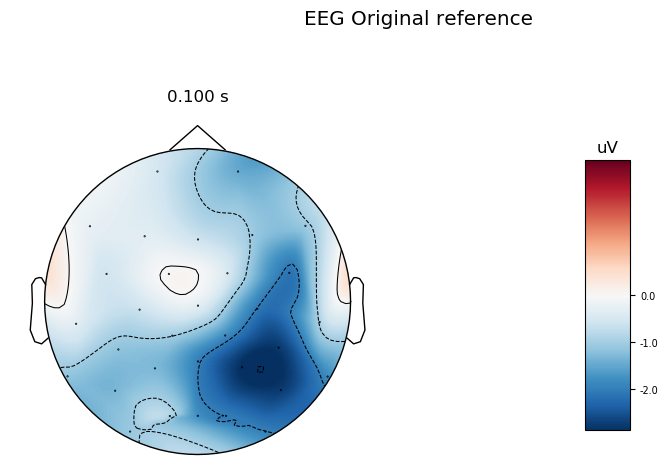

In [77]:
raw_no_ref, _ = mne.set_eeg_reference(raw1, [])

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True)
event_id = {'FINMAT': 1, 'FINCON': 2,
            'FORMAT': 3, 'FORCON': 4}
tmin, tmax = -0.2, 0.8
events = mne.find_events(raw1, stim_channel='STI 014')
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax)

i = 0
for value in events[:, 2]:
    if value <=60:
        events[i, 2] = 1
    elif value <=120:
        events[i, 2] = 2
    elif value <=180:
        events[i, 2] = 3
    else:
        events[i, 2] = 4
    i += 1

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title), time_unit='s')
evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title, time_unit='s')